## Exploratory Data Analysis on Dataset - Terrorism

**Name :** Sarang Mukund Ahirrao

**Task 2:** Exploratory Data Analysis on Dataset - Terrorism

In [2]:
#importing required libraries
import math
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk(r'globalterrorism.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Importing Dataset

In [3]:
terror = pd.read_csv('/content/globalterrorism.csv',encoding='latin1')

In [ ]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:

terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

## Checking the null values in data

In [7]:
terror.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state             73
Region             0
city               0
latitude         606
longitude        606
AttackType         0
Killed          2751
Wounded         4175
Target           176
Summary        15646
Group              1
Target_type        0
Weapon_type        1
Motive         15913
dtype: int64

In [8]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16581 entries, 0 to 16580
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         16581 non-null  int64  
 1   Month        16581 non-null  int64  
 2   Day          16581 non-null  int64  
 3   Country      16581 non-null  object 
 4   state        16508 non-null  object 
 5   Region       16581 non-null  object 
 6   city         16581 non-null  object 
 7   latitude     15975 non-null  float64
 8   longitude    15975 non-null  float64
 9   AttackType   16581 non-null  object 
 10  Killed       13830 non-null  float64
 11  Wounded      12406 non-null  float64
 12  Target       16405 non-null  object 
 13  Summary      935 non-null    object 
 14  Group        16580 non-null  object 
 15  Target_type  16581 non-null  object 
 16  Weapon_type  16580 non-null  object 
 17  Motive       668 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usa

In [9]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: El Salvador
City with the most attacks: San Salvador
Region with the most attacks: Western Europe
Year with the most attacks: 1980
Month with the most attacks: 5
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


### Installing WordCloud

In [12]:
pip install wordcloud

### Importing WordCloud

In [11]:
from wordcloud import WordCloud
from scipy import signal

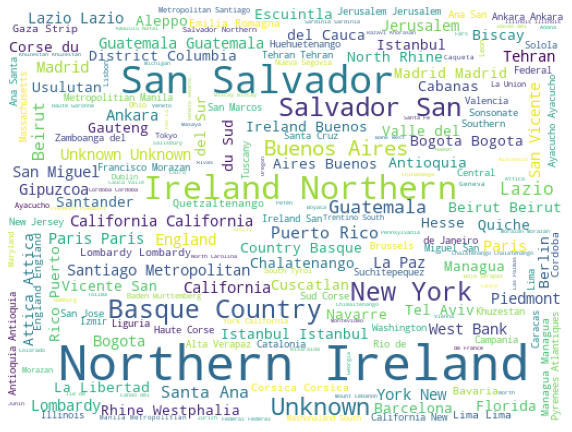

In [13]:
cities = terror.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [14]:
terror['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    1418
1986       1
Name: Year, dtype: int64

## Number of Attacks Each Year

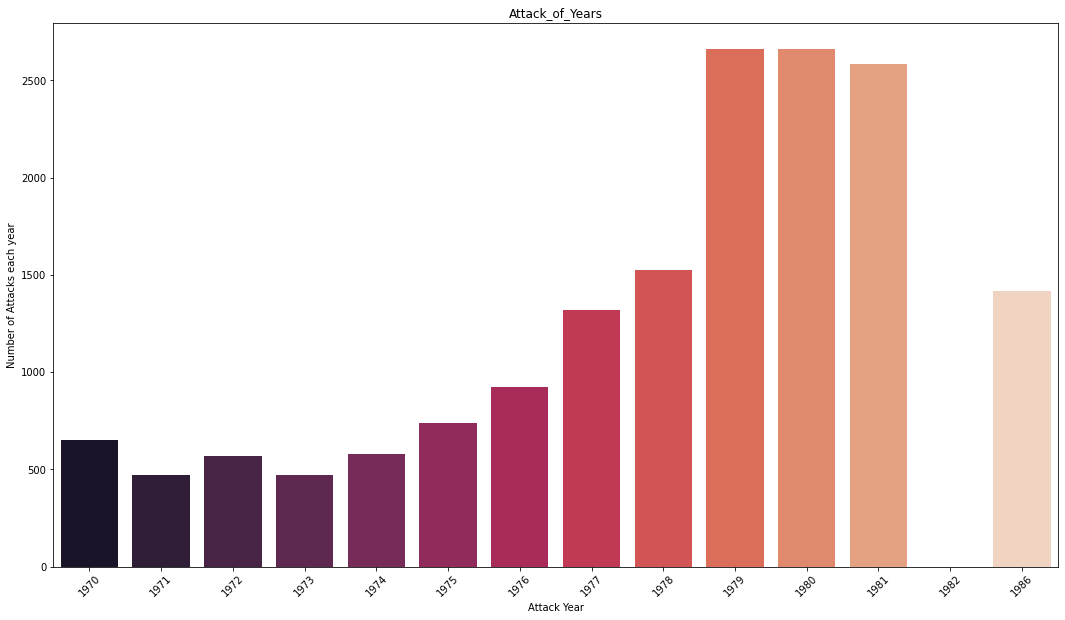

In [15]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

### Number Of Terrorist Activities Each Year

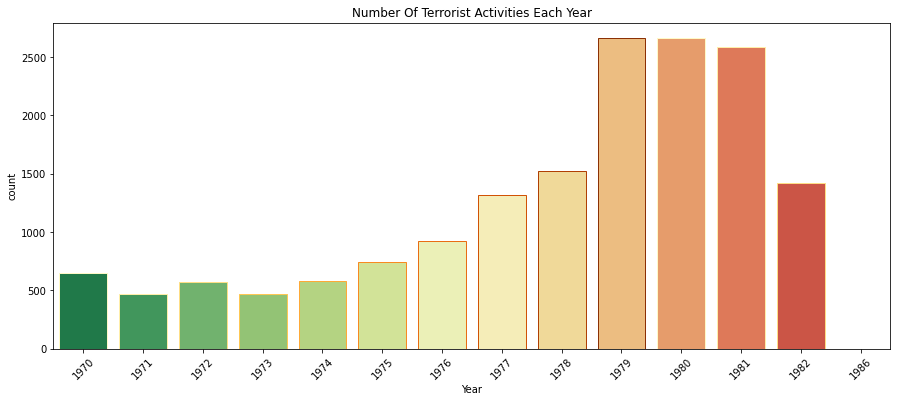

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

## Terrorist Activities by Region in Each Year

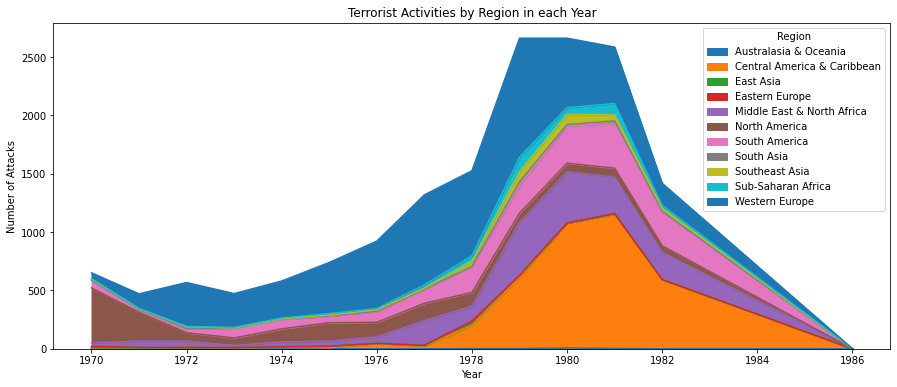

In [17]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [18]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed'] + terror['Wounded']

In [19]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]

In [20]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [21]:
heat.head()

Year,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982
Country,,,,,,,,,,,
Argentina,0.0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0
El Salvador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,93.5,0.0
Ethiopia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


# Heatmap

### Top 40 Worst Terror Attacks in History from 1982 to 2016

In [23]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

### Countries affected by Terrorist Attack :

In [24]:
terror.Country.value_counts()[:15]

El Salvador       2075
United Kingdom    1965
United States     1668
Spain             1247
Italy             1213
Guatemala         1087
Colombia           869
France             669
Turkey             591
Nicaragua          402
Iran               371
Israel             365
Lebanon            358
Peru               349
Argentina          344
Name: Country, dtype: int64

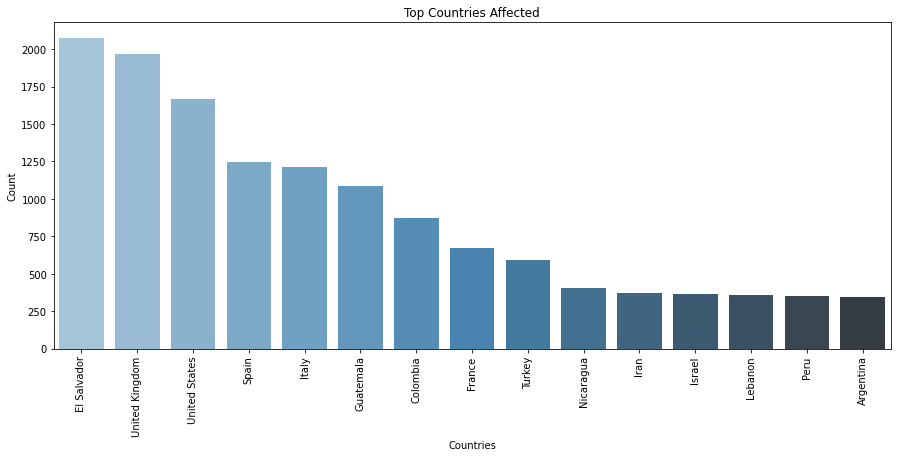

In [25]:
 plt.subplots(figsize=(15,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## Installing folium

In [27]:
pip install folium

### importing folium

In [28]:
import folium
from folium.plugins import MarkerCluster 
filterYear = terror['Year'] == 1970

In [29]:
filterData = terror[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataLis

In [31]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

###  In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.  84% of the terrorist attacks in 1970 were carried out on the American continent.

In [32]:
terror.Group.value_counts()[1:15]

Irish Republican Army (IRA)                         1259
Basque Fatherland and Freedom (ETA)                  671
Farabundo Marti National Liberation Front (FMLN)     389
Palestinians                                         338
Revolutionary Armed Forces of Colombia (FARC)        232
M-19 (Movement of April 19)                          220
Protestant extremists                                211
Red Brigades                                         207
Shining Path (SL)                                    199
Sandinista National Liberation Front (FSLN)          197
Ulster Volunteer Force (UVF)                         178
Corsican National Liberation Front (FLNC)            174
Left-Wing Militants                                  170
People's Liberation Forces (FPL)                     167
Name: Group, dtype: int64

In [33]:
test = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]


In [34]:
test.Country.unique()

array(['Peru'], dtype=object)

In [35]:
terror_df_group = terror.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())

['Palestinians' 'Irish Republican Army (IRA)' 'Protestant extremists'
 'Basque Fatherland and Freedom (ETA)'
 'Revolutionary Armed Forces of Colombia (FARC)'
 'M-19 (Movement of April 19)'
 'Farabundo Marti National Liberation Front (FMLN)']


In [36]:

map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'], 
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

### The Above map looks untidy even though it can be zoomed in to view the Country in question. Hence in the next chart, I have used Folium's Marker Cluster to cluster these icons. This makes it visually pleasing and highly interactive.

In [37]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [38]:

# Total Number of people killed in terror attack
killData = terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 19367


## Types of Date

In [39]:
attackData = terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [40]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [41]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,9155,3560,4313,585,184,232,362,17,959


# Killed Type

In [42]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 160.0+ bytes


## Number of Killed in Terrorist Attacks by Countries

In [43]:
countryData = terror.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)


In [44]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Barbados,Belgium,Belize,Bolivia,Botswana,Brazil,Brunei,Cambodia,Canada,Central African Republic,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,France,Gabon,Greece,Grenada,...,Poland,Portugal,Qatar,Rhodesia,Saudi Arabia,Senegal,Seychelles,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Tunisia,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,53,0,0,0,22,329,6,12,0,0,12,73,10,0,12,1,55,0,4,2,3,0,31,1031,10,22,26,0,5,3,11,1,8,73,5007,135,90,2,125,9,...,0,14,1,217,5,0,0,0,1,56,2,81,0,4,492,8,5,6,50,466,25,1,190,0,41,325,70,10,1964,212,4,0,11,52,67,0,2,1,5,26


In [45]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

## Number of people killed by countries

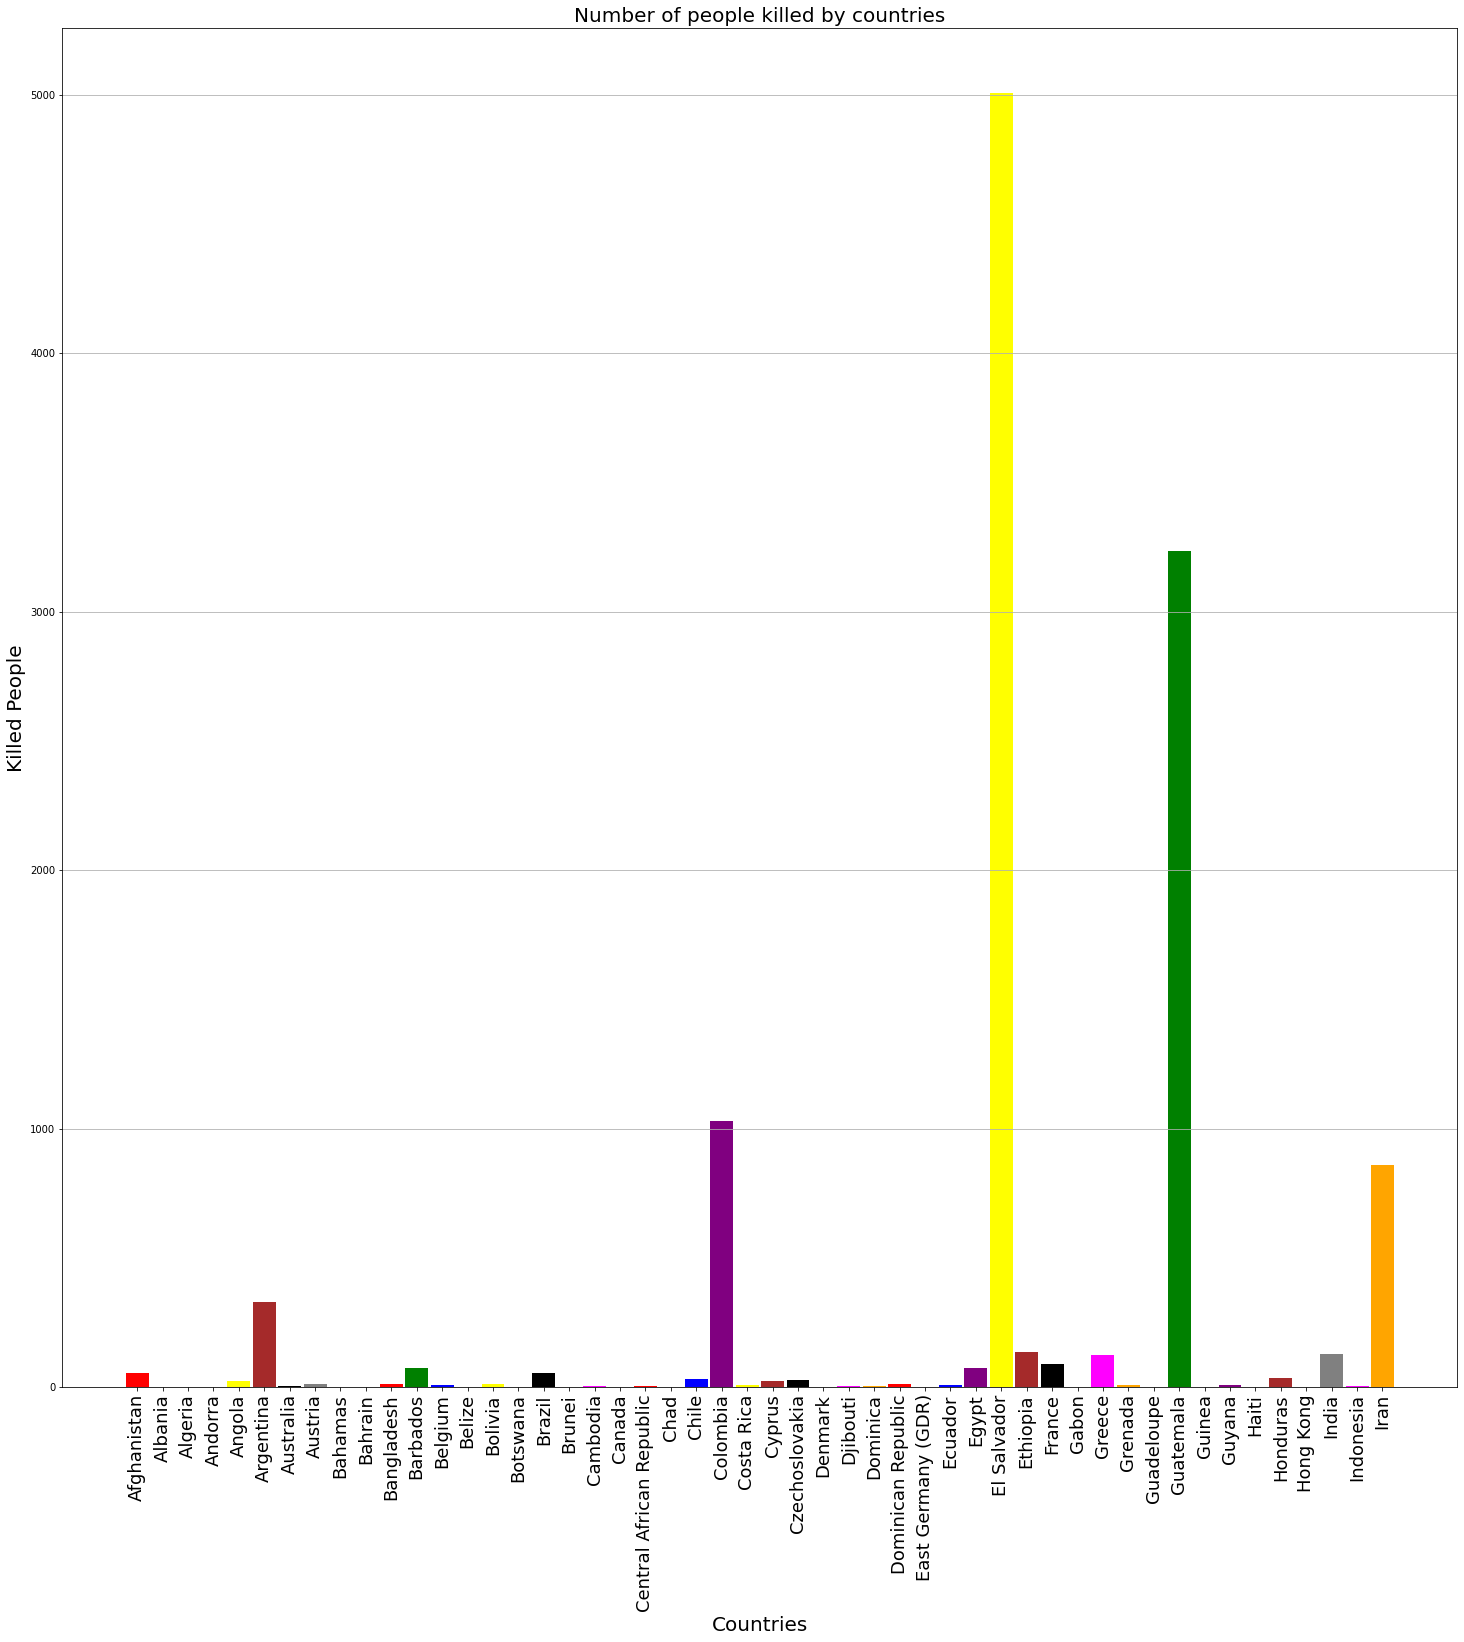

In [46]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

## Number of people killed by countries

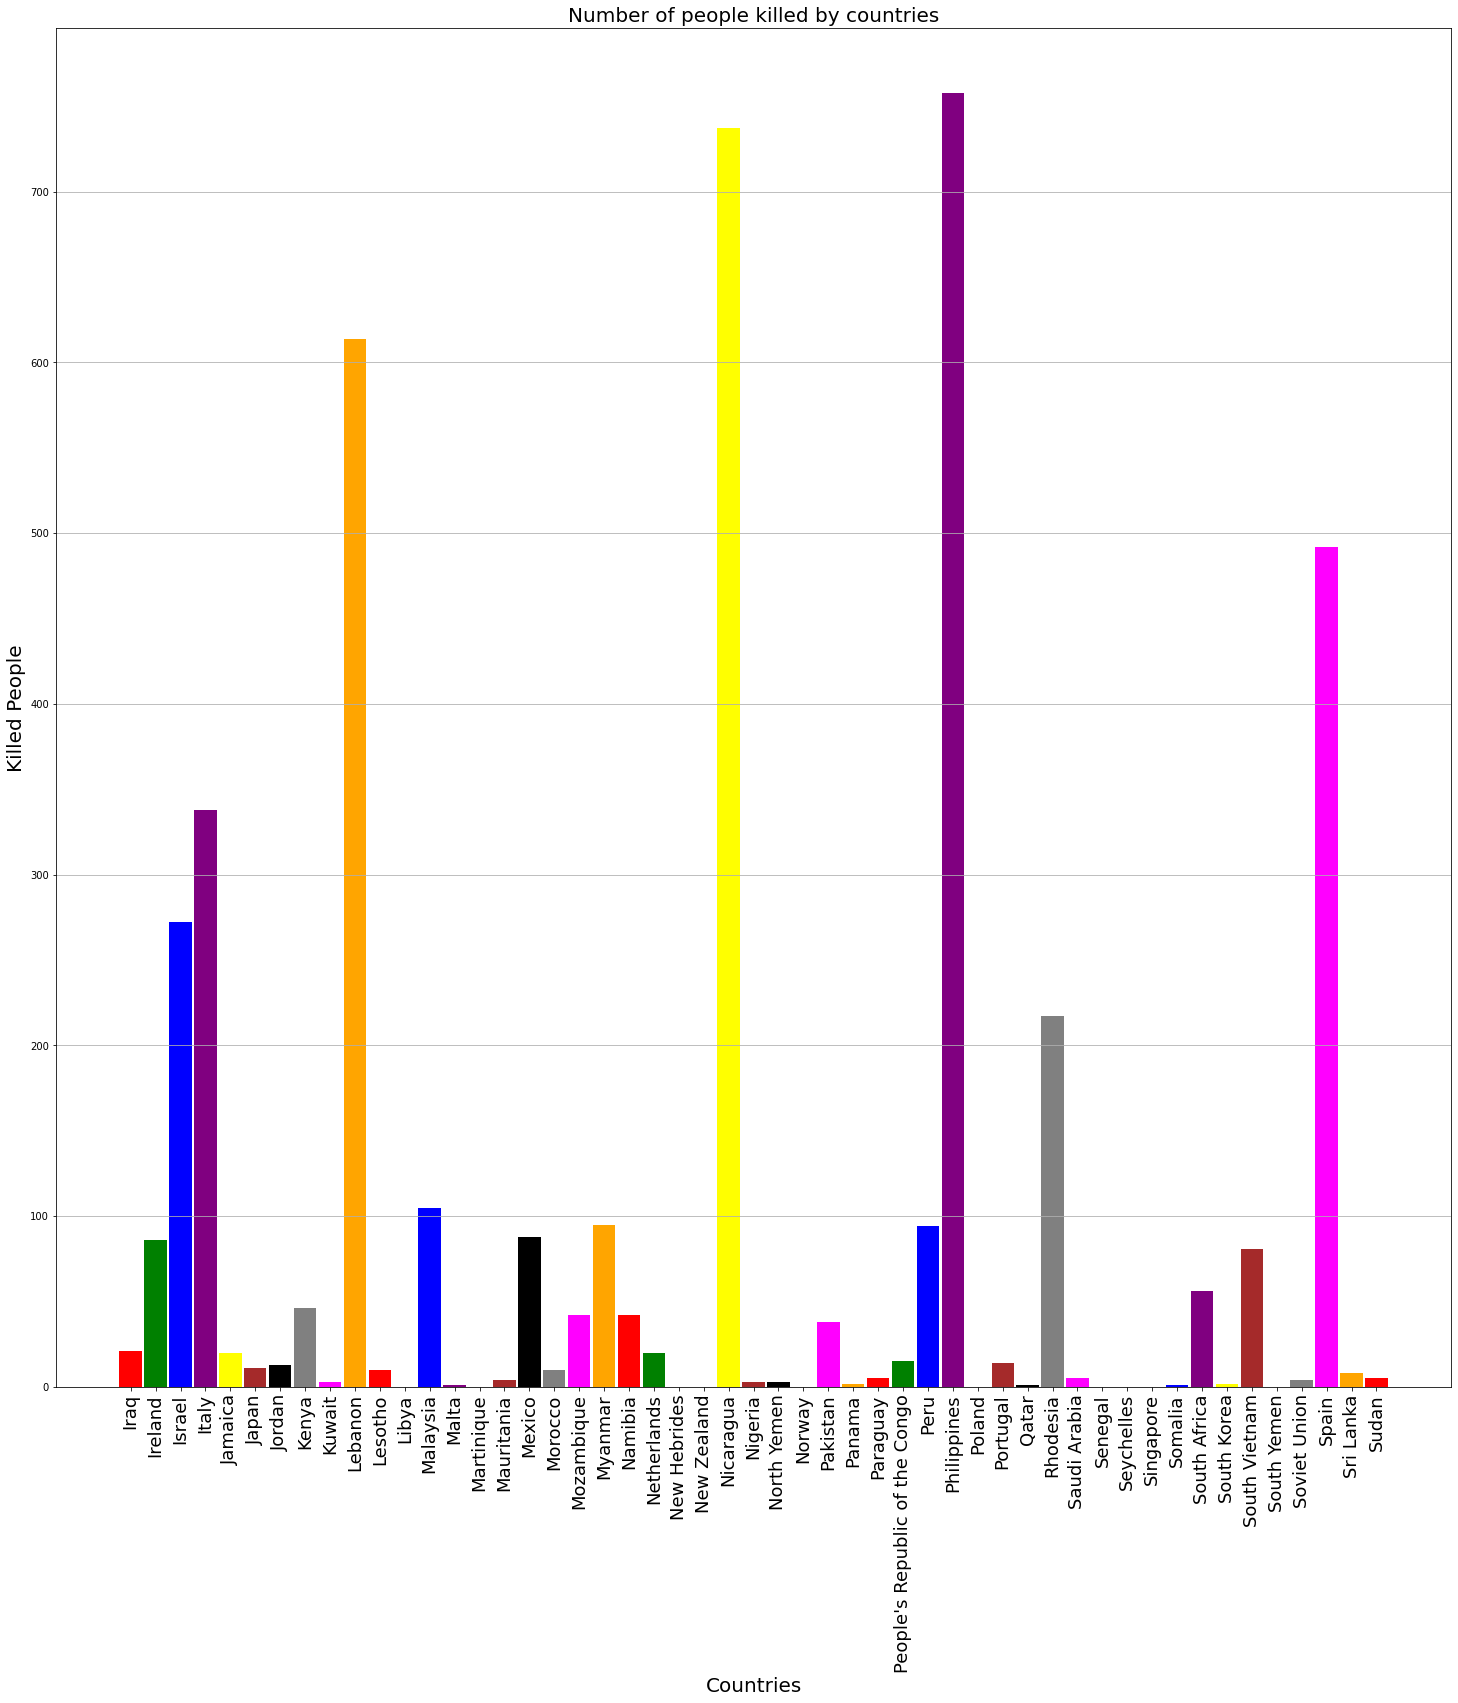

In [47]:

labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

## Number of people killed by countries

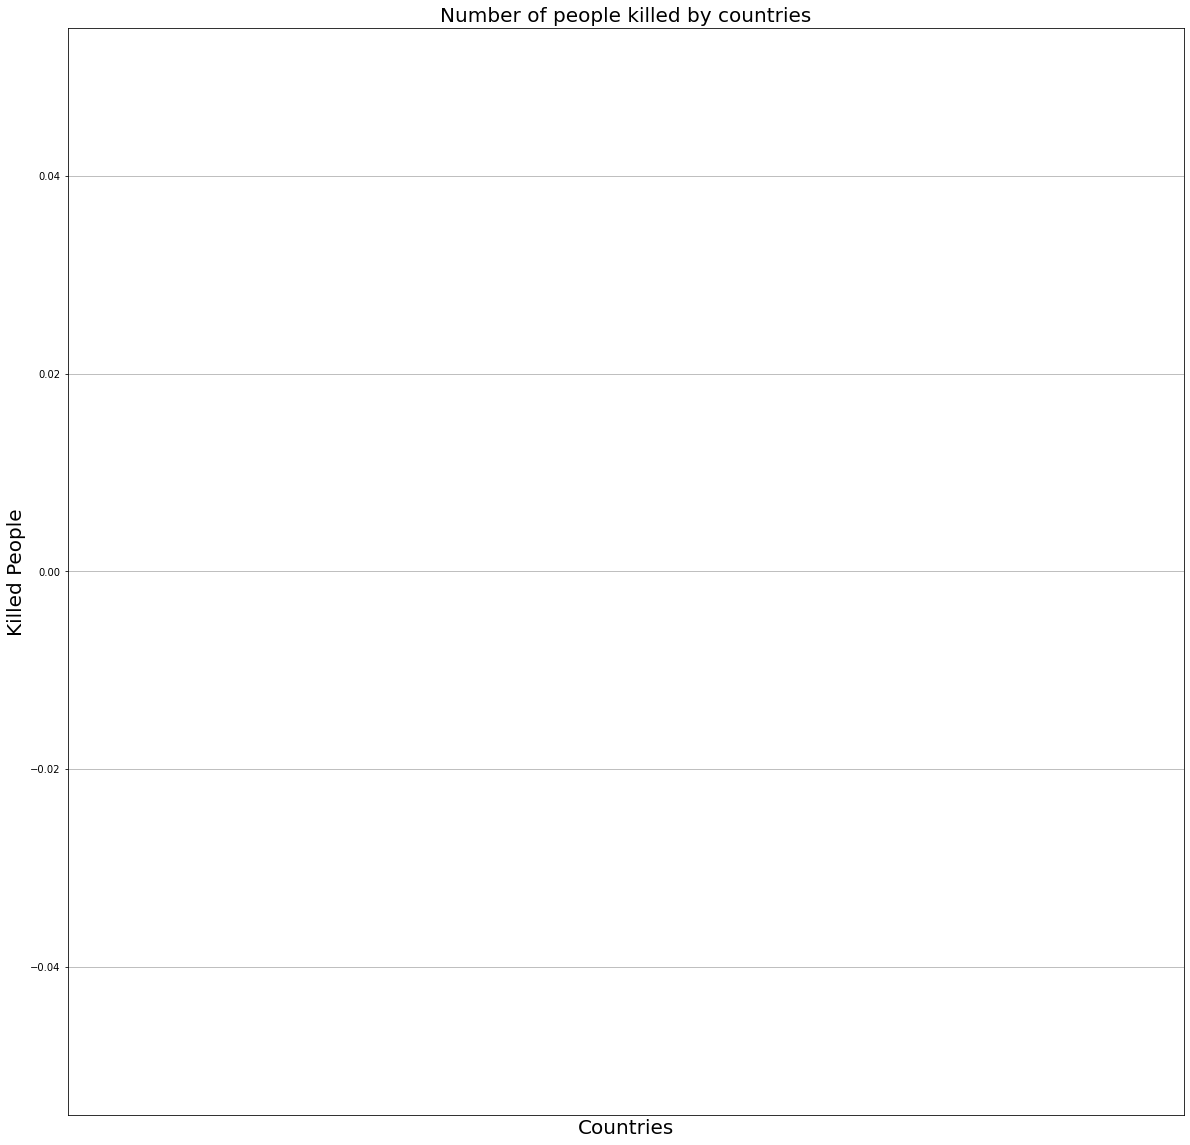

In [48]:

labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

## top 10 countries with most number of attacks

In [49]:
attack = terror.Country.value_counts()[:10]
attack

El Salvador       2075
United Kingdom    1965
United States     1668
Spain             1247
Italy             1213
Guatemala         1087
Colombia           869
France             669
Turkey             591
Nicaragua          402
Name: Country, dtype: int64

### Top 10 terrorist groups with most number of attacks

In [50]:
 terror.Group.value_counts()[1:15]

Irish Republican Army (IRA)                         1259
Basque Fatherland and Freedom (ETA)                  671
Farabundo Marti National Liberation Front (FMLN)     389
Palestinians                                         338
Revolutionary Armed Forces of Colombia (FARC)        232
M-19 (Movement of April 19)                          220
Protestant extremists                                211
Red Brigades                                         207
Shining Path (SL)                                    199
Sandinista National Liberation Front (FSLN)          197
Ulster Volunteer Force (UVF)                         178
Corsican National Liberation Front (FLNC)            174
Left-Wing Militants                                  170
People's Liberation Forces (FPL)                     167
Name: Group, dtype: int64

# Thank You!